# Econometrics Problem Set 2

### In this problem set we are going to look at the realtionship between a number of the characteristics of basketball players and their wages. Firstly i am going to import all the different libraries that I need. In addition to the ones that i imported in problem set 1 i am also importing seaborn which is a great data visualisation library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

### Next is to load the data in to a dataframe using pandas and take a look at the data that we have in a tbaular form.

In [2]:
file_path = r"C:\Users\tomdo\Desktop\Stats\econometrics\Econometrics_Problem Set 2\Econometrics_Problem-Set-2\nbasal.xls"
df = pd.read_excel(file_path)
df.head()

,ID,marr,wage,exper,age,coll,games,minutes,guard,forward,...,assists,draft,allstar,avgmin,lwage,black,children,expersq,agesq,marrblck
0,1,1,1002.5,4,27,4,77,2867,1,0,...,5,19.0,0,37.23,6.91,1,0,16,729,1
1,2,1,2030.0,5,28,4,78,2789,1,0,...,9,28.0,0,35.76,7.62,1,1,25,784,1
2,3,0,650.0,1,25,4,74,1149,0,0,...,0,19.0,0,15.53,6.48,1,0,1,625,0
3,4,0,2030.0,5,28,4,47,1178,0,1,...,2,1.0,0,25.06,7.62,1,0,25,784,0
4,5,0,755.0,3,24,4,82,2096,1,0,...,3,24.0,0,25.56,6.63,1,0,9,576,0


### Now its time to do a bit of data exploration. I start of by looking at the descriptive stats (in particular the correlation matrix which quickly allow you to test which of the variables are correclated with each other) and by visualising it using box plots, scatter plots and a chart for the correlation matrix.

In [3]:
df.describe()

,ID,marr,wage,exper,age,coll,games,minutes,guard,forward,...,assists,draft,allstar,avgmin,lwage,black,children,expersq,agesq,marrblck
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,240.00000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.00000
mean,135.000000,0.442379,1423.827509,5.118959,27.394052,3.717472,65.724907,1682.193309,0.420074,0.408922,...,2.453532,20.20000,0.115242,23.979257,6.952379,0.806691,0.345725,37.721190,761.892193,0.33829
std,77.797815,0.497595,999.774074,3.400062,3.391292,0.754410,18.851110,893.327771,0.494491,0.492551,...,2.148124,18.73582,0.319909,9.731086,0.881428,0.395629,0.476491,46.537021,195.149406,0.47401
min,1.000000,0.000000,150.000000,1.000000,21.000000,0.000000,3.000000,33.000000,0.000000,0.000000,...,0.000000,1.00000,0.000000,2.890000,5.010000,0.000000,0.000000,1.000000,441.000000,0.00000
25%,68.000000,0.000000,650.000000,2.000000,25.000000,4.000000,57.000000,983.000000,0.000000,0.000000,...,1.000000,7.00000,0.000000,16.730000,6.480000,1.000000,0.000000,4.000000,625.000000,0.00000
50%,135.000000,0.000000,1186.000000,4.000000,27.000000,4.000000,74.000000,1690.000000,0.000000,0.000000,...,2.000000,14.50000,0.000000,24.820000,7.080000,1.000000,0.000000,16.000000,729.000000,0.00000
75%,202.000000,1.000000,2014.500000,7.000000,30.000000,4.000000,79.000000,2438.000000,1.000000,1.000000,...,3.000000,28.25000,0.000000,33.260000,7.610000,1.000000,1.000000,49.000000,900.000000,1.00000
max,269.000000,1.000000,5740.000000,18.000000,41.000000,4.000000,82.000000,3533.000000,1.000000,1.000000,...,13.000000,139.00000,1.000000,43.090000,8.660000,1.000000,1.000000,324.000000,1681.000000,1.00000


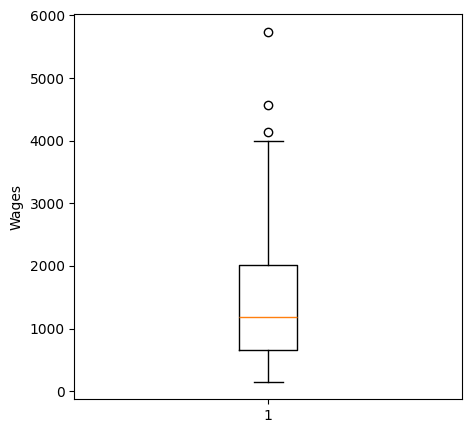

In [4]:
plt.figure(figsize=(5,5)) 
data = df["wage"]
plt.boxplot(data)
plt.ylabel("Wages")
plt.show()

In [5]:
corr_matrix = df.corr()
print(corr_matrix)

                ID      marr      wage     exper       age      coll  \
ID        1.000000  0.059375  0.015450  0.081858  0.087600  0.028609   
marr      0.059375  1.000000  0.158117  0.328272  0.367295 -0.043529   
wage      0.015450  0.158117  1.000000  0.409176  0.342444 -0.105632   
exper     0.081858  0.328272  0.409176  1.000000  0.941165  0.087341   
age       0.087600  0.367295  0.342444  0.941165  1.000000  0.074305   
coll      0.028609 -0.043529 -0.105632  0.087341  0.074305  1.000000   
games    -0.028050  0.069110  0.303766  0.148206  0.126373 -0.014931   
minutes  -0.004794  0.105087  0.563374  0.214265  0.147060 -0.068114   
guard    -0.065082  0.030498 -0.124664 -0.052026 -0.065701  0.069272   
forward   0.078192 -0.025298  0.051110 -0.000191  0.005929 -0.049425   
center   -0.016784 -0.006947  0.096684  0.068450  0.078386 -0.026273   
points   -0.033796  0.123694  0.657027  0.190789  0.104821 -0.120423   
rebounds -0.007444 -0.033022  0.540872  0.163501  0.116512 -0.11

### Now that is a biig correlation matrix which is quite difficult to read. So i the next few cells i have looked to see if i can make it a bit more readable. Firstly i do a nested for loop to iterate through each column of the correlation matrix and then if the correlation is greater than a certain amount i print out the variable names and the correlation of it.

In [6]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [7]:
threshold = 0.35
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        correlation_value = corr_matrix.iloc[i, j]
        
        if abs(correlation_value) > threshold:
            print(f"Columns '{corr_matrix.columns[i]}' and '{corr_matrix.columns[j]}' have a correlation of {correlation_value}")


Columns 'marr' and 'age' have a correlation of 0.36729457848626224
Columns 'marr' and 'agesq' have a correlation of 0.3573913682191796
Columns 'marr' and 'marrblck' have a correlation of 0.8027546757251224
Columns 'wage' and 'exper' have a correlation of 0.4091764023483812
Columns 'wage' and 'minutes' have a correlation of 0.5633736813209487
Columns 'wage' and 'points' have a correlation of 0.6570265226341696
Columns 'wage' and 'rebounds' have a correlation of 0.540871514054682
Columns 'wage' and 'draft' have a correlation of -0.36253089676220024
Columns 'wage' and 'allstar' have a correlation of 0.3973330947682341
Columns 'wage' and 'avgmin' have a correlation of 0.6217885393400762
Columns 'wage' and 'lwage' have a correlation of 0.8938394249339148
Columns 'exper' and 'age' have a correlation of 0.941165244761515
Columns 'exper' and 'lwage' have a correlation of 0.40562163101967924
Columns 'exper' and 'expersq' have a correlation of 0.9503272713234403
Columns 'exper' and 'agesq' have 

### Having found that quite difficult to follow too i did some googling and found seaborn does a good visual of the correlation matrix so below i produce that and that allows me to see there are some strong correlations between variables such as age and experience and points and mins. In particular for our analysis on wages variables like points, experience and minuites are correlated with the wage.

<Axes: >

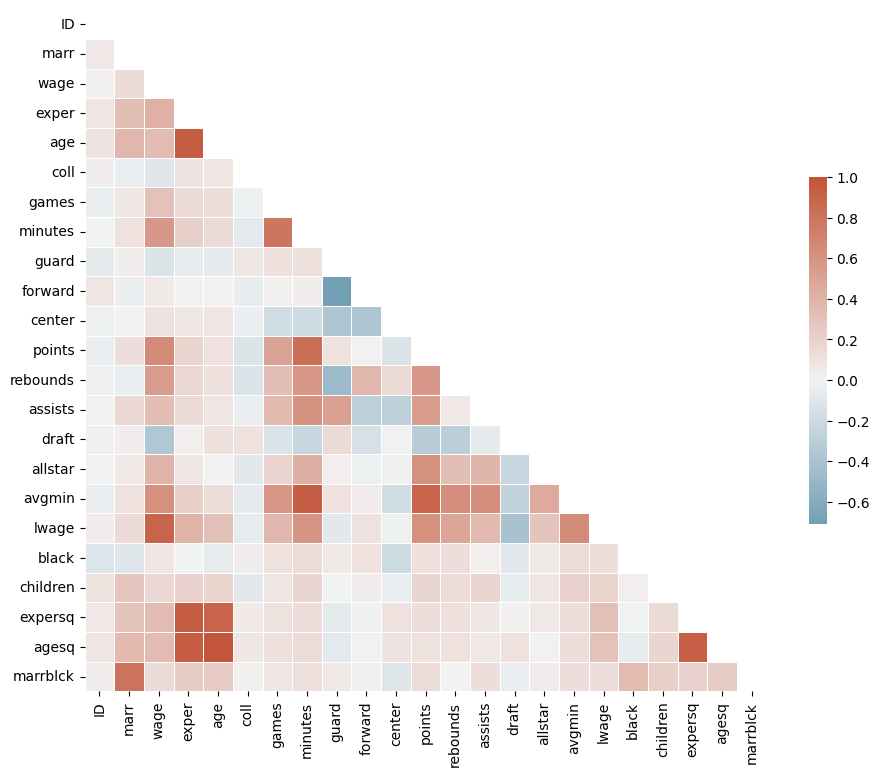

In [8]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: xlabel='exper', ylabel='wage'>

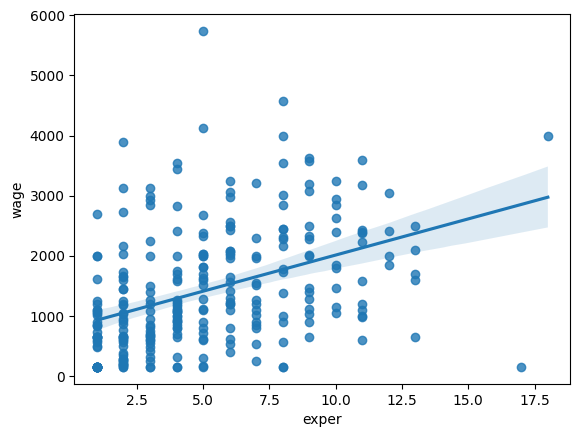

In [9]:
sns.regplot(x=df["exper"],y=df["wage"],data=df)

### Now were going to have a look at some simple bi variate regression models and interpret their results. First we look at the effect of experience on wages.

In [10]:
x, y = df["exper"], df["wage"]

In [11]:
x = sm.add_constant(x)

In [12]:
model = sm.OLS(y, x)

In [13]:
results = model.fit()

In [14]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     53.69
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           2.79e-12
Time:                        12:58:11   Log-Likelihood:                -2214.7
No. Observations:                 269   AIC:                             4433.
Df Residuals:                     267   BIC:                             4441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        807.9317    100.847      8.011      0.0

### Here we can see that an extra year of experience will increase the wage by 120. However there are likely to be a number of other variables that also have an impact on wages. Similarly to experience is age. Lets see how that impacts on wages.

In [15]:
x, y = df["age"], df["wage"]

In [16]:
x = sm.add_constant(x)

In [17]:
model = sm.OLS(y, x)

In [18]:
results = model.fit()

In [19]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     35.47
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           8.14e-09
Time:                        12:58:11   Log-Likelihood:                -2222.5
No. Observations:                 269   AIC:                             4449.
Df Residuals:                     267   BIC:                             4456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1341.7284    467.888     -2.868      0.0

In [20]:
intercept = results.params[0]
coeef = results.params[1]

age = 90

exp_wage = intercept + (coeef*age)
exp_wage

C:\Users\tomdo\AppData\Local\Temp\ipykernel_16144\3534265507.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = results.params[0]
C:\Users\tomdo\AppData\Local\Temp\ipykernel_16144\3534265507.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coeef = results.params[1]


7744.186724117136

### Above i have used the regression results to try and estimate what the wage of someone who is 90 would be. The results are nearly 8,000. Obviously that is nonsense and demonstrates the risks of making predictions about data outside of the sample range. Lets see what the results are when we include both age and experience as independant variables.

In [21]:
x, y = df[["age","exper"]], df["wage"]

In [22]:
x = sm.add_constant(x)

In [23]:
model = sm.OLS(y, x)

In [24]:
results = model.fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     29.86
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           2.00e-12
Time:                        12:58:11   Log-Likelihood:                -2212.1
No. Observations:                 269   AIC:                             4430.
Df Residuals:                     266   BIC:                             4441.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3295.2932   1096.404      3.006      0.003    1136.559    5454.028
age         -110.1153     48.335     -2.278      0.024    -205.284     -14.947
exper        223.6860     48.210      4.640      0.000     128.763     318.609
==============================================================================
Omnibus:                       57.784   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.329
Skew:                           1.077   Prob(JB):                     2.02e-26
Kurtosis:                       5.433   Cond. No.                         559.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### By adding in two independent variables, both age and experience that are correlated with each other, the sign of the coeficient for age has reversed to a negative. When we have age as the only independant variable the sign is positive. Here we likely have collinearity of regressors which is causing this adverse result. Lets now have a look at the effect of points scored on wages.

In [26]:
x, y = df["points"], df["wage"]
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     202.8
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.28e-34
Time:                        12:58:11   Log-Likelihood:                -2163.3
No. Observations:                 269   AIC:                             4331.
Df Residuals:                     267   BIC:                             4338.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        278.1023     92.694      3.000      0.003      95.598     460.606
points       111.6667      7.841     14.241      0.000      96.228     127.105
==============================================================================
Omnibus:                       38.558   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.491
Skew:                           0.853   Prob(JB):                     1.21e-13
Kurtosis:                       4.548   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

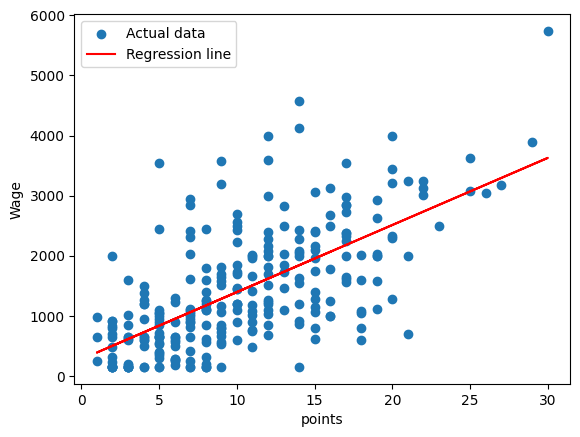

In [27]:
coef_intercept, coef_points = results.params

plt.scatter(df["points"],df["wage"],label="Actual data")

plt.plot(df["points"], coef_intercept + coef_points * df["points"], color='red', label="Regression line")

plt.xlabel("points")
plt.ylabel("Wage")
plt.legend()
plt.show()

In [28]:
increase = coef_points * 10
print(increase)

1116.6669734567758


### Here it looks like the there might be some heteroscedasticity lets produce a graph to check if this is the case.

In [29]:
residuals = results.resid

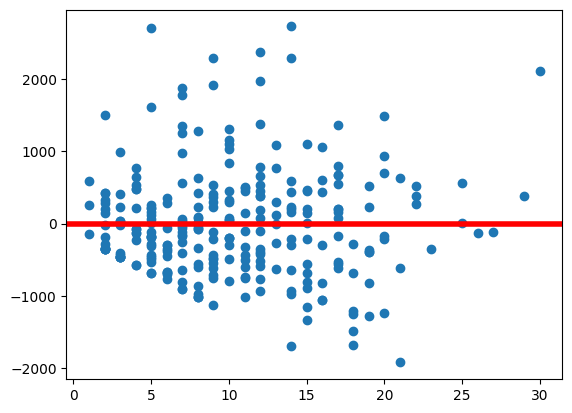

In [30]:
plt.scatter(df["points"],residuals)
plt.axhline(linewidth=4, color='r')

### As you can see the variation of the error terms are not even for each value of points, it looks like the variance of the error term increases initially before decreasing as the points you score gets towards the top end of the sample. This make intuative sense as player who dont score a lot of points are probably paid a similar amount, those in the middle of the pack for points scoring might earn a lot and might not earn a lot (really good defenders versus poor attackers). There is little variation in those that score a lot of points as they are likely to be the top attackers.

### I suspect the impact of points on salary that the model has predicted it is too high. There is probably some reverse causality happening as players who are paid more are more likely to score more points. Also, points likely captures the effects of other variables that are also important in determining wages. Some players from better teams have better players playing with them, and hence tend to have more chances to score. Similarly players on better teams tend to be paid more.

### Now i am going to create some new independant variable and include them in a new regression model.

In [37]:
df["pointssq"] = df["points"].apply(lambda x: x ** 2)
df["pointsc"] = df["points"].apply(lambda x: x ** 3)

In [38]:
df[["points", "pointssq", "pointsc"]]

,points,pointssq,pointsc
0,16,256,4096
1,13,169,2197
2,6,36,216
3,7,49,343
4,11,121,1331
...,...,...,...
264,20,400,8000
265,5,25,125
266,10,100,1000
267,16,256,4096


In [39]:
x, y = df[["points", "pointssq"]], df["wage"]
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     102.0
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.36e-33
Time:                        13:13:02   Log-Likelihood:                -2162.8
No. Observations:                 269   AIC:                             4332.
Df Residuals:                     266   BIC:                             4342.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        396.6413    148.060      2.679      0.008     105.123     688.160
points        85.4355     26.726      3.197      0.002      32.814     138.057
pointssq       1.0777      1.050      1.027      0.306      -0.989       3.144
==============================================================================
Omnibus:                       40.249   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.998
Skew:                           0.879   Prob(JB):                     2.09e-14
Kurtosis:                       4.591   Cond. No.                         668.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
x, y = df[["points", "pointssq", "pointsc"]], df["wage"]
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     70.16
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           2.00e-33
Time:                        13:13:26   Log-Likelihood:                -2160.7
No. Observations:                 269   AIC:                             4329.
Df Residuals:                     265   BIC:                             4344.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.2577    221.555      0.267      0.789    -376.974     495.489
points       207.2324     65.419      3.168      0.002      78.426     336.039
pointssq      -9.6892      5.387     -1.799      0.073     -20.295       0.917
pointsc        0.2606      0.128      2.037      0.043       0.009       0.512
==============================================================================
Omnibus:                       38.460   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.175
Skew:                           0.871   Prob(JB):                     3.84e-13
Kurtosis:                       4.437   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### So across the three models that use some measure of points per game the R-squared which describes how the model fits the data are broadly similar - roughly between 0.43 and 0.44. Similarly, the adjusted R-squared stat are in the same range. On that basis it is probably best to use the first model that just uses points as the indepenant variable rather than points squared and points cubed as this has a much clearer interpretation. 

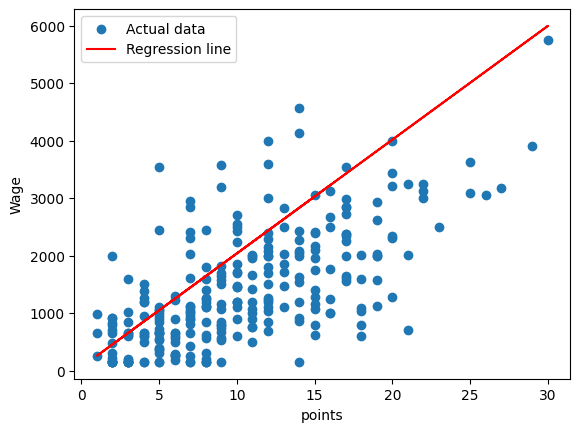

In [46]:
coef_intercept, coef_points, coef_pointssq, coef_pointsc = results.params

plt.scatter(df["points"],df["wage"],label="Actual data")

plt.plot(df["points"], coef_intercept + (coef_points * df["points"]) + (coef_pointssq * df["points"]) + (coef_pointsc * df["points"]) , color='red', label="Regression line")

plt.xlabel("points")
plt.ylabel("Wage")
plt.legend()
plt.show()

### Now for a bit of freestyle and to try and create the best model. First i will have a look at some of the headers again and look at the correlations between them to ensure that we have no collinearity between the independant variables.

<Axes: >

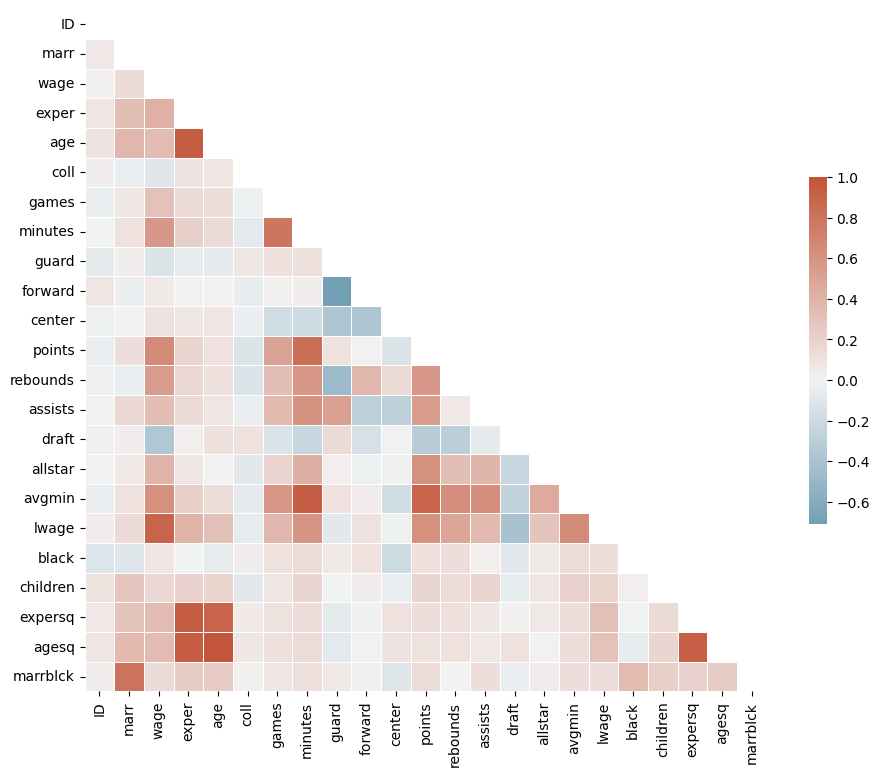

In [47]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [48]:
x, y = df[["points", "exper"]], df["wage"]
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     141.4
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.48e-42
Time:                        16:56:40   Log-Likelihood:                -2141.9
No. Observations:                 269   AIC:                             4290.
Df Residuals:                     266   BIC:                             4301.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.2538     99.778     -0.674      0.501    -263.709     129.201
points       102.1158      7.391     13.816      0.000      87.564     116.668
exper         86.6095     12.787      6.773      0.000      61.433     111.786
==============================================================================
Omnibus:                       38.850   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.608
Skew:                           0.809   Prob(JB):                     3.44e-15
Kurtosis:                       4.823   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""